# Examen 2: Métodos computacionales. Manuela Guisao Sepulveda

## Profesor: Hernán Salinas
### Universidad de Antioquia

El examen consta de dos partes, cada una con igual valor. Es un examen individual y no se permite el uso de herramientas de inteligencia artificial para su realización. Una lectura detallada será suficiente para resolver ambos problemas, basándose en los conocimientos adquiridos en el curso.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import sympy as sp
from scipy.optimize import fmin_powell

### I. Radiación de Cuerpo Negro:

 La radiación de cuerpo negro, se refiere a la radiación electromagnética emitida por un objeto que absorbe toda la radiación incidente sin reflejar nada. La cual  puede ser modelada según la ley de Planck que relaciona la intensidad de la radiación de un cuerpo negro con la temperatura del objeto. A medida que la temperatura aumenta, la longitud de onda máxima de la radiación se desplaza hacia longitudes de onda más cortas. Para generar una intuición,  piensa en  trozo  de carbón, el cual representa un ejemplo cercano a lo que se conoce como un cuerpo negro en física. Este elemento tiene la particularidad de reflejar mínimamente la luz, capturando prácticamente toda la radiación que recibe. Al alcanzar temperaturas elevadas, similar a las de las brasas ardientes, el carbón comienza a emitir radiación tanto en el rango visible como en el infrarrojo del espectro.

  La radiación de cuerpo negro puede ser modelada empleando la ley de Planck para describir la densidad  espectral  de energía de la radiación emitida por un cuerpo negro a una temperatura (T). La ley de Planck establece que la densidad espectral de energía $u(\lambda, T)$  para un cuerpo negro está dada por:

\begin{equation}
u(\lambda, T) = \frac{{8\pi hc}}{{\lambda^5}} \cdot \frac{1}{{e^{\frac{{hc}}{{\lambda k_B T}}} - 1}}
\end{equation}

 donde:

$h = 6.62607015  \times 10^{-34} \mathrm{J} s$ : es la constante de Planck.

$c = 299792458 \mathrm{m/s}$ : es la velocidad de la luz.


$k_B = 1.380649 \times 10^{-23}\mathrm{J/K}$ : es la constante de Boltzmann.

$ \lambda$ es la longitud de onda.


Podemos integrar la densidad espectral de energía sobre todas las longitudes de onda para obtener la potencia total emitida por unidad de área de un cuerpo negro a una temperatura (T) (ley  de Stefan-Boltzmann):


\begin{equation}
P_{\text{total}} = \sigma T^4
\end{equation}

donde:

$\sigma$ es la constante de Stefan-Boltzmann.


Su tarea en este examen será:

1. Realizar una gráfica de $u(\lambda, T)$ vs $\lambda$, toma valores de $\lambda$ entre $1\mathrm{nm}$ y $8\mathrm{\mu m}$, para valores de
```T=np.array([1000,2000,4000,5000]) ```K


Las curvas resultantes deben reflejar el comportamiento típico de datos experimentales, tal como se muestra al ejecutar el siguiente código :

```python
import requests
from io import StringIO


# URL del archivo txt en línea
url_del_archivo = 'http://www.sc.ehu.es/sbweb/fisica3/calor/radiacion/espectro.txt'

# Realizar una petición GET para obtener el contenido del archivo
respuesta = requests.get(url_del_archivo)

# Verificar que la petición fue exitosa
if respuesta.status_code == 200:
    # Acceder al contenido del archivo
    data_string = respuesta.text
else:
    print(f"Error al acceder al archivo: {respuesta.status_code}")
# Utilizar StringIO para simular un archivo en memoria a partir del string
data = StringIO(data_string)
# Convertir el string a DataFrame, especificando el separador de espacios
df = pd.read_csv(data, sep=" ", header=None)
# Asignar nombres a las columnas si es necesario
df.columns = ['A', 'B', 'C', "D"]
# Mostrar el DataFrame
plt.plot(df.A, df.B)
```



2. Determina la longitud de onda para el cual se obtiene el  máximo valor de cada unas de las anteriores curvas, comprueba que $\lambda_{max} T=2897.8 \mathrm{\mu mK}$



3. De la ley de densidad espectral de energía, mostrar que la potencia total emitida por unidad de área $P_{total}$ es:



\begin{equation}
P_{\text{total}} =  \frac{c}{4}\int_0^{\infty} u(\lambda, T) \mathrm{d}\lambda = \sigma T^4
\end{equation}

donde $\sigma=5.67\times 10^{-8}\mathrm{W m^{-2} K^{-4}}$. Para resolver la integral, se recomienda emplear la sustitución $x=\frac{hc}{\lambda k_BT}$ y emplear algún método computacional de integración conocido :

\begin{equation}
P_{\text{total}} \propto \int_0^{\infty} \frac{x^3}{e^{x}-1} \mathrm{d}x
\end{equation}

muestre que el valor de la integral se aproxima al valor esperado $\frac{\pi^4}{15}$.

Con el resultado anterior, construya una curva de $P_{total}$ vs $T^4$, ¿su resultado esta acorde con los esperado?



<ipython-input-23-cb33e2a66a2a>:7: RuntimeWarning: overflow encountered in exp
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)


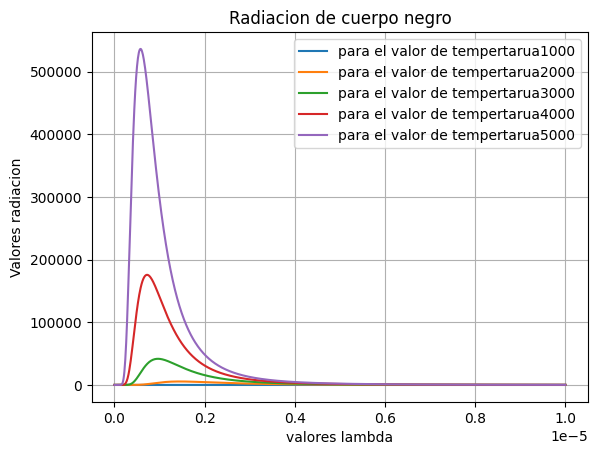

In [ ]:
#primer punto
def planck(lambd, T):
  h=  6.62607015e-34
  c= 299792458
  kb= 1.380649e-23
  planck1= (8*np.pi*h*c)/(lambd**5)
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)
  return planck1*planck2


lambs= np.linspace(1e-9,1e-5,1000)
Temperature= np.array([1000,2000,3000,4000,5000])

for i in Temperature:
  plt.plot(lambs,planck(lambs,i),label=f'para el valor de tempertarua{i}')
plt.title('Radiacion de cuerpo negro')
plt.xlabel('valores lambda')
plt.ylabel('Valores radiacion')
plt.legend()
plt.grid()
plt.show()

<ipython-input-23-cb33e2a66a2a>:7: RuntimeWarning: overflow encountered in exp
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)


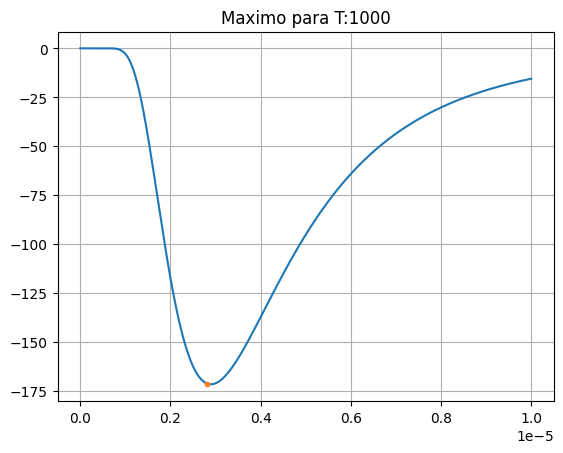

comparando el resultado con lambT=2897.9*10e-6 y 2814.589803375032


In [ ]:
#segundo punto
def neg_planck(lamb,T): #invierto la funcion y se halla el minimo asi será el maximo de la otra funcion
  return -planck(lamb,T)

lambs=np.linspace(1e-9,1e-5,1000)
'''
se procede a calcular el maximo para cada valor de T con la funcion minimize_scalar de scipy porque no encuentro como optimizar
el calculo de otra manera
'''

T=1000
maximo1= sc.optimize.minimize_scalar(neg_planck, bounds=(2.7e-6,3e-6), args=(T))
plt.plot(lambs,neg_planck(lambs,T))
plt.plot(maximo1.x,maximo1.fun,'.')
plt.title('Maximo para T:1000')
plt.grid()
plt.show()
print(f'comparando el resultado con lambT=2897.9*10e-6 y {maximo1.x*T*1e6}')

<ipython-input-23-cb33e2a66a2a>:7: RuntimeWarning: overflow encountered in exp
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)


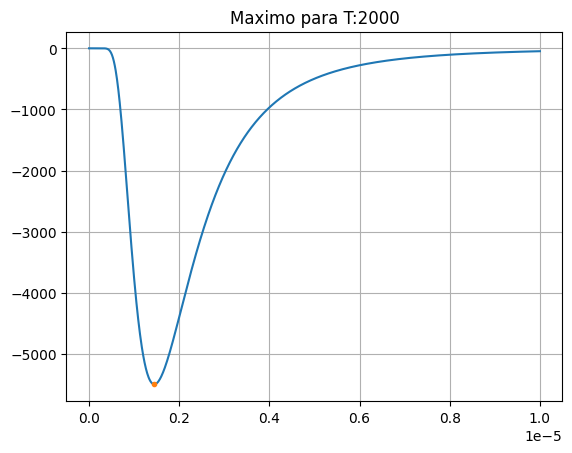

comparando el resultado con lambT=2897.9*10e-6 y 2887.538820250189


In [ ]:
T2=2000
maximo2= sc.optimize.minimize_scalar(neg_planck, bounds=(1.1e-6,2e-6), args=(T2))
plt.plot(lambs,neg_planck(lambs,T2))
plt.plot(maximo2.x,maximo2.fun,'.')
plt.title('Maximo para T:2000')
plt.grid()
plt.show()
print(f'comparando el resultado con lambT=2897.9*10e-6 y {maximo2.x*T2*1e6}')

<ipython-input-23-cb33e2a66a2a>:7: RuntimeWarning: overflow encountered in exp
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)


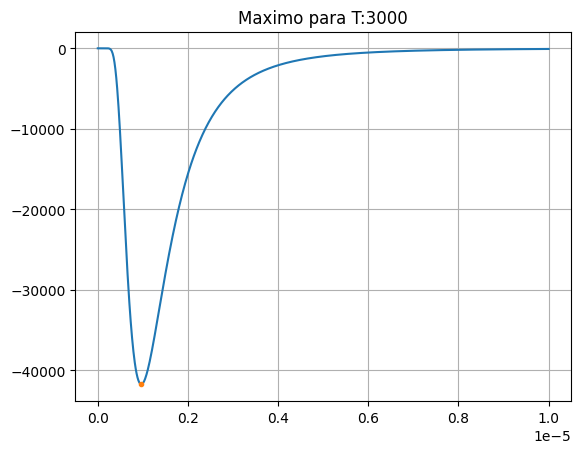

comparando el resultado con lambT=2897.9*10e-6 y 2858.359213500126


In [ ]:
T3=3000
maximo3= sc.optimize.minimize_scalar(neg_planck, bounds=(8e-7,1.2e-6), args=(T3))
plt.plot(lambs,neg_planck(lambs,T3))
plt.plot(maximo3.x,maximo3.fun,'.')
plt.title('Maximo para T:3000')
plt.grid()
plt.show()
print(f'comparando el resultado con lambT=2897.9*10e-6 y {maximo3.x*T3*1e6}')

<ipython-input-23-cb33e2a66a2a>:7: RuntimeWarning: overflow encountered in exp
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)


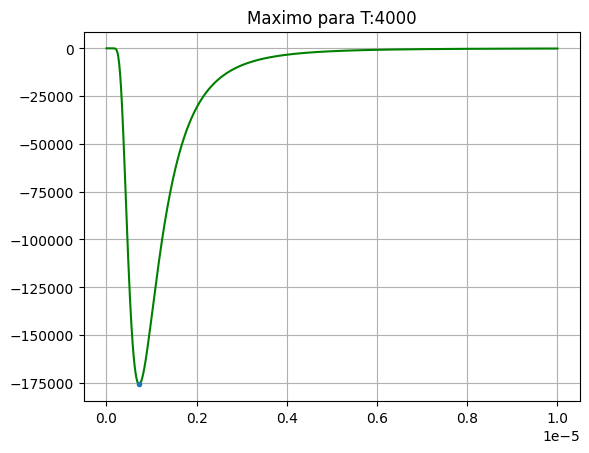

comparando el resultado con lambT=2897.9*10e-6 y 2887.538820250189


In [ ]:
T4=4000
maximo4= sc.optimize.minimize_scalar(neg_planck, bounds=(5.5e-7,1e-6), args=(T4))
plt.plot(lambs,neg_planck(lambs,T4),'g')
plt.plot(maximo4.x,maximo4.fun,'.')
plt.title('Maximo para T:4000')
plt.grid()
plt.show()
print(f'comparando el resultado con lambT=2897.9*10e-6 y {maximo4.x*T4*1e6}')

<ipython-input-23-cb33e2a66a2a>:7: RuntimeWarning: overflow encountered in exp
  planck2= 1/(np.exp((h*c)/(lambd*kb*T))-1)


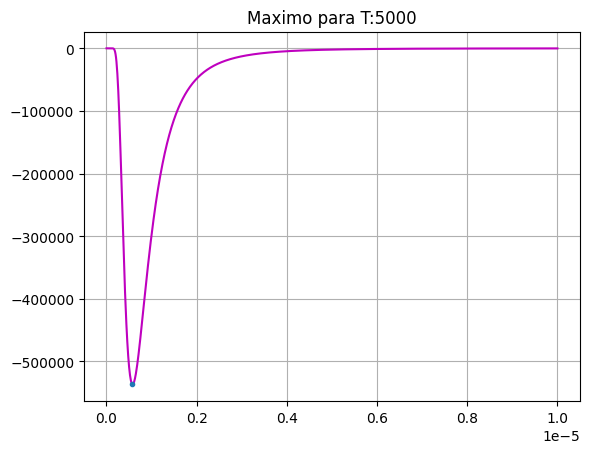

comparando el resultado con lambT=2897.9*10e-6 y 2836.881039375368


In [ ]:
T5=5000
maximo5= sc.optimize.minimize_scalar(neg_planck, bounds=(3e-7,1e-6), args=(T5))
plt.plot(lambs,neg_planck(lambs,T5),'m')
plt.plot(maximo5.x,maximo5.fun,'.')
plt.title('Maximo para T:5000')
plt.grid()
plt.show()
print(f'comparando el resultado con lambT=2897.9*10e-6 y {maximo5.x*T5*1e6}')

In [ ]:
#tercer punto, como se tiene una integral que va hasta infinito, se utlizara el metodo quad de scipy
from scipy.integrate import quad
fun= lambda x: (x**3)/(np.exp(x)-1)
integral, error =quad(fun, 0, np.infty) #evalua la integral desde cero hasta infinito
print(f'el reslutado de la integral es {integral}  y su error es {error}')

valor_esperado= (np.pi**4)/15 #es el valor que se espera obtener
error1= integral-valor_esperado
print(f'la diferencia es {error1}') #se ve que la diferencia es muy pequeña, entonces si da el valor esperado

el reslutado de la integral es 6.49393940226683  y su error es 2.628470028924825e-09
la diferencia es 1.7763568394002505e-15


<ipython-input-19-ea9527fed20b>:3: RuntimeWarning: overflow encountered in exp
  fun= lambda x: (x**3)/(np.exp(x)-1)


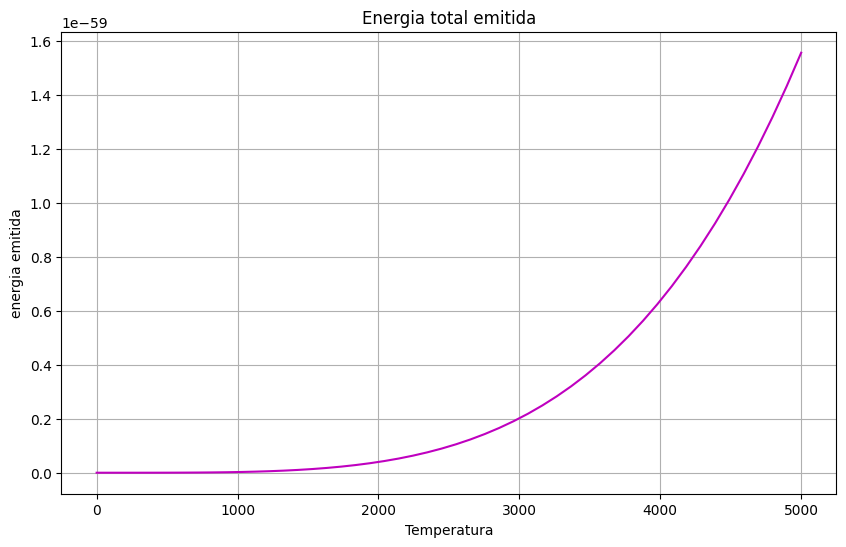

In [ ]:
def total(T):
  h=  6.62607015e-34
  c= 299792458
  kb= 1.380649e-23
  alpha= (c*(2*np.pi)*(kb**4)*(T**4))/(h*(c**3))
  return integral*alpha

rango= np.linspace(0,5000)
plt.figure(figsize=(10,6))
plt.plot(rango,total(rango),'m',label='Energia total emitida')

plt.title('Energia total emitida')
plt.xlabel('Temperatura')
plt.ylabel('energia emitida')
plt.grid()
plt.show()

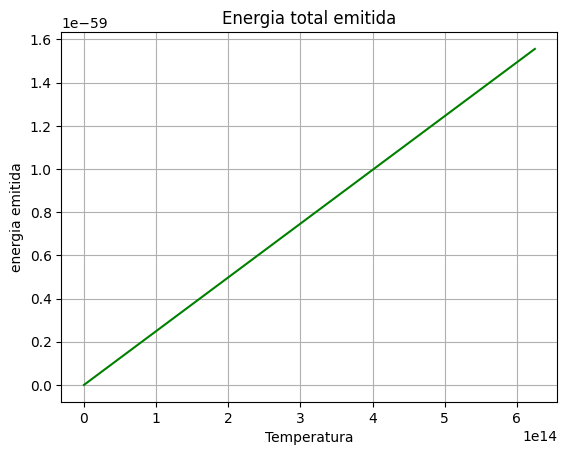

In [ ]:
plt.plot(rango**4, total(rango),'g')
plt.title('Energia total emitida')
plt.xlabel('Temperatura')
plt.ylabel('energia emitida')
plt.grid()
plt.show()

# 2. Calentamiento Global
El conjunto de datos a continuación ofrece una visión detallada de las anomalías de temperatura terrestre:


https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


Las anomalías de temperatura son variaciones en la temperatura media superficial del planeta respecto a un promedio histórico. Estas variaciones pueden ser tanto positivas (más cálidas) como negativas (más frías) y constituyen indicadores esenciales del cambio climático a nivel mundial. Para obtener información adicional, consulte:


https://climate.nasa.gov/en-espanol/signos-vitales/temperatura-global/?intent=111

Este ejercicio no solo busca profundizar en la comprensión del calentamiento global, sino también distinguir entre la interpolación y la construcción de modelos. Con el código proporcionado que procesa los datos de cambio climático reportados por la National Aeronautics and Space Administration,


```python
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSauvizado",  "Promedio_5"]


# Muestra las primeras filas del DataFrame
print(data.head())
```

Realice lo siguiente en un gráfico combinado:



1. Gráfico de la media móvil de 5 años (Promedio_5) frente al año, representado con líneas.
2. Gráfico de los datos sin suavizar (NoSauvizado) frente al año.


3. Analice el gráfico resultante y extraiga conclusiones.

Posteriormente, construiremos un modelo para evaluar el incremento de la temperatura en años recientes utilizando el código de regresión dado a continuación:


```python
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define la función del modelo que deseas ajustar
# En este caso, una función lineal: f(x) = m*x + b
def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x, y)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x, y, label='Datos')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

```


 Seleccione los datos del periodo 2000-2020 y proceda a:

4. Ajustar los datos sin suavizar (NoSauvizado) vs al año de forma lineal.
5. Interpolar los datos entre los años 2000 y 2020.


6. ¿Es preferible realizar una interpolación o un ajuste de parámetros al modelo en este caso? Justifique su respuesta.

7. ¿Cómo podría predecirse el incremento en la temperatura anómala para el año 2030? Justifique su respuesta.






In [ ]:
import pandas as pd
import matplotlib.pylab as plt
url="https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
data = pd.read_csv(url, sep='\\s+',header=None, skiprows=5)
data.columns = ["Año" ,"NoSuavizado",  "Promedio_5"]


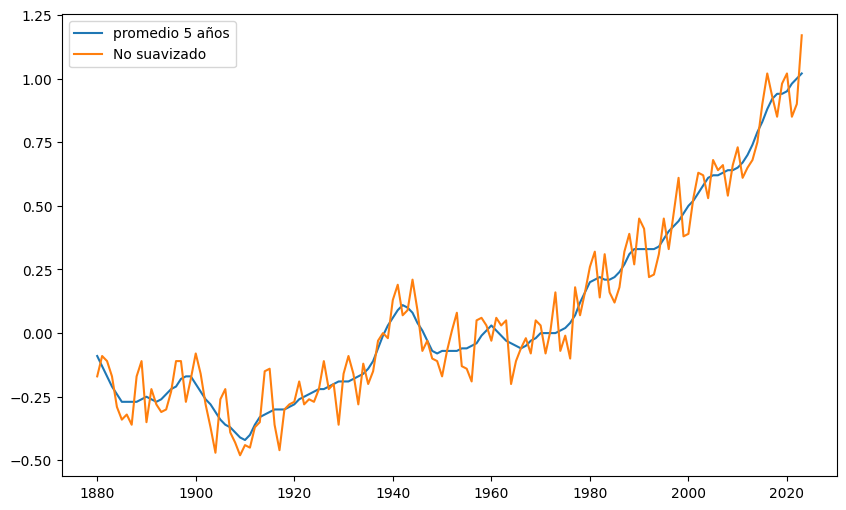

In [ ]:
#primer y segundo punto, graficas combinadas
plt.figure(figsize=(10,6))
plt.plot(data['Año'],data['Promedio_5'], label='promedio 5 años')
plt.plot(data['Año'],data['NoSuavizado'],label='No suavizado')
plt.legend()
plt.show()

###3. conclusion del grafico
de est grafico se puede concluir que con el pasar de los años, la temperatura aumenta cada vez mas provocando asi un grave cambio climatico, pero que desde los 1970 mas o menos este cambio a sido mas constante y aumentando exponencialmente.

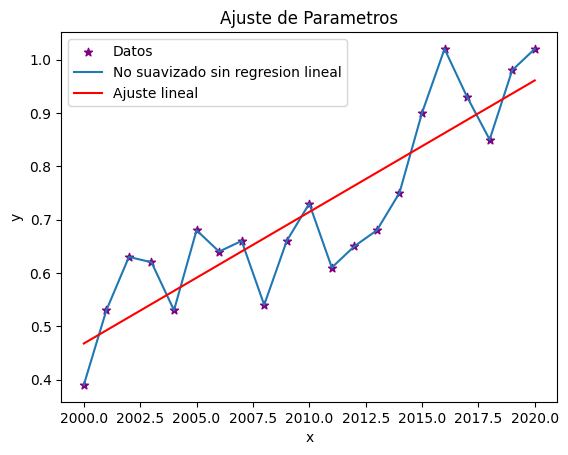

In [ ]:
#para definir los valores del periodo entre 2000-2020 utilizamos .loc
data_periodo = data.loc[(data['Año'] >= 2000) & (data['Año'] <= 2020)]
#4)utilizando la regresion lineal
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def linear_func(x, m, b):
    return m * x + b

# Datos de ejemplo, reemplace en esta linea por los valores de interes
x_data= data_periodo['Año']
y_data= data_periodo['NoSuavizado']

# Realizar el ajuste de curva
params, covariance = curve_fit(linear_func, x_data, y_data)

# Parámetros del ajuste
m, b = params

# Generar datos de x para la línea de ajuste
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_func(x_fit, m, b)

# Graficar datos y ajuste
plt.scatter(x_data, y_data,label='Datos', marker='*',color='purple')
plt.plot(data_periodo['Año'], data_periodo['NoSuavizado'], label='No suavizado sin regresion lineal')
plt.plot(x_fit, y_fit, label='Ajuste lineal', color='red')
plt.title('Ajuste de Parametros')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

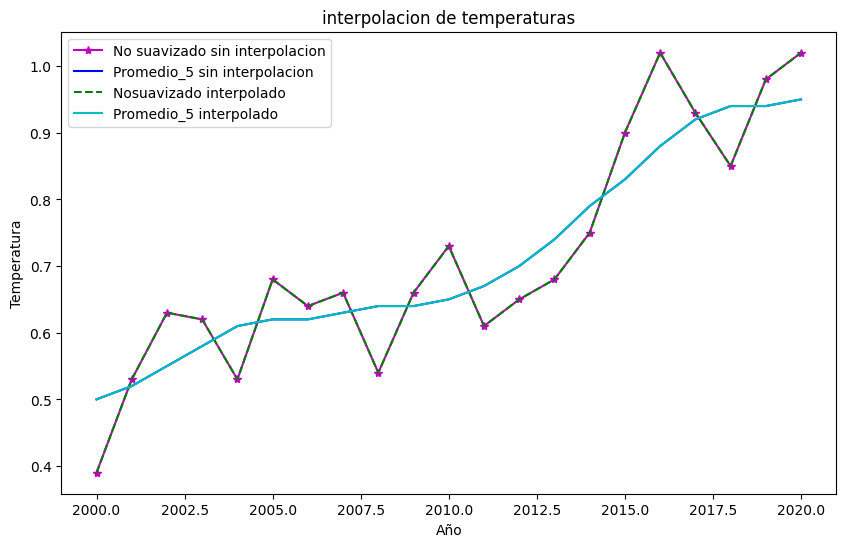

In [ ]:
#5)realizando interpolacion utilizando interpolate de scipy
data_interpolado= data_periodo.interpolate(method='linear') #se utiliza interpolacion lineal
plt.figure(figsize=(10,6))
plt.plot(data_periodo['Año'],data_periodo['NoSuavizado'],'m',label='No suavizado sin interpolacion', marker='*')
plt.plot(data_periodo['Año'],data_periodo['Promedio_5'],'-b',label='Promedio_5 sin interpolacion')
plt.plot(data_interpolado['Año'],data_interpolado['NoSuavizado'],'--g',label='Nosuavizado interpolado')
plt.plot(data_interpolado['Año'],data_interpolado['Promedio_5'],'c', label='Promedio_5 interpolado')
plt.title('interpolacion de temperaturas')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


###6. es preferible interpolacion o ajuste de parametros?
es preferible trabajar con ajuste de parametros ya que este permite trabajar con linea recta lo cual se hace mas facil que trabajar con polinomios como da en la interpolacion, ademas de que estos datos se ajustan bien a este modelo de ajuste de parametros.

###7. predecir el aumento de temperatura anomala para el año 2030
se puede predecir mediante un ajuste de parametros, evaluando para el año 2030

In [ ]:
def linear_func(x, m, b):
    return m * x + b

x_data= data_periodo['Año']
y_data= data_periodo['NoSuavizado']

params, covariance = curve_fit(linear_func, x_data, y_data)

m, b = params

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = linear_func(x_fit, m, b)

predict_year=2030
valor_predecir= linear_func(predict_year,m,b)
print(f"Predicción de la temperatura anómala para el año {predict_year}: {valor_predecir:.2f} °C")

Predicción de la temperatura anómala para el año 2030: 1.21 °C
